In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

#  Analyse swiss charts data
#  from 7.10.2018 until 4.10.1998

### read json data from file into pandas object
path2data = 'data/charts_lyrics_1998-2018.json'
data = pd.read_json(path_or_buf=path2data, orient=None, typ='frame', dtype=True, convert_axes=True, convert_dates=True,
                 keep_default_dates=True, numpy=False, precise_float=False, date_unit=None, encoding='utf-8',
                 lines=False, chunksize=None, compression='infer')

## Get n most common words for data
def get_top_n_words(lyrics, n=None):
    vec = CountVectorizer(stop_words='english').fit(lyrics)
    bag_of_words = vec.transform(lyrics)    # matrix where each row represents a specific text
    sum_words = bag_of_words.sum(axis=0)    # vector that contains the sum of each word occurrence
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] # Create tuples with word and word count
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True) # Sort list
    return words_freq[:n]

## Plot most common words as bar chart
def plotTopWords(common_words, title):
    nr_words = len(common_words)
    count = [x[1] for x in common_words]
    words = [x[0] for x in common_words]

    fig, ax = plt.subplots()

    index = np.arange(nr_words)
    bar_width = 0.3
    opacity = 0.4

    rec = plt.barh(index, count, bar_width,
                     alpha=opacity,
                     color='b',
                     label='Ocurrences')

    plt.xlabel('Word Count')
    plt.title('Most frequent word in lyrics ('+str(title)+")")
    plt.yticks(index, words)
    plt.legend()

    plt.tight_layout()
    plt.show()

def chartTitle(dates):
    maxYear = dates.max()
    minYear = dates.min()
    if maxYear.year == minYear.year:
        return maxYear.year
    else:
        return str(minYear.year)+" - "+str(maxYear.year)

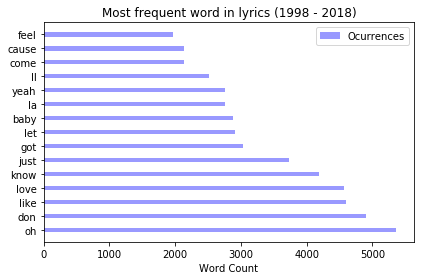

In [3]:
### Plot Top words for all Data (1998 - 2018)
common_words = get_top_n_words(data.lyrics, 15) ## Get n most common words for data
title = chartTitle(data.date) ## Get years for plot title
plotTopWords(common_words,title) ## Plot most common words